In [1]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [2]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [3]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [4]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 1.2.3
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [5]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

1.2.3


# 1. Prepare training/test data

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [6]:
import os.path

! rm -rf 2_EC-EC
! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

--2025-05-17 18:38:09--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-05-17 18:38:09--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75781 (74K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[===================>]  74.00K  --.-KB/s    in 0.002s  

2025-

In [7]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-05-17 18:38:31--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-05-17 18:38:31--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111169 (109K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 108.56K  --.-KB/s    in 0.002s  

2025-05

# 2-1. Train–Test with default kernel parameters (scale 0.4, weight 1.0)

In addition to the reference data files, following configuration file `train.in` is all you need to run aenet-gpr. 

First, let us check the GPR evaluation error for test set with default kernel parameters.

In [27]:
! rm -f train.in

if os.path.isfile("../example/2_EC-EC/train.in"):
    ! cp ../example/2_EC-EC/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in

--2025-05-17 18:45:47--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in [following]
--2025-05-17 18:45:48--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566 [text/plain]
Saving to: ‘train.in’

train.in            100%[===================>]     566  --.-KB/s    in 0s      

2025-05-17 18:45:48 (10.4 MB/s) - ‘train.in’ saved [566/566]



In [28]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
# scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 3


In [29]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 18:45:54.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.045355 s
Maximum CPU memory used:             0.537483 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (60,)  # (N_data, )
Force data size: (60, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

# 2-2. Visualize the results

In [30]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [31]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

0.00491100862964231 0.02302288273258455


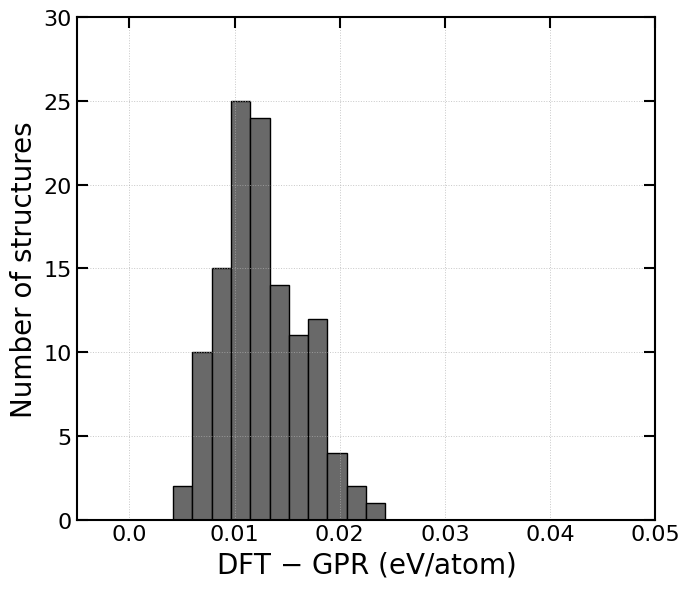

In [32]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.005, 0.05))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.005, 0.05])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.005, 0.05])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 30])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 30])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 3-1. Train–Test (scale 1.5, weight 1.0)

Since, the constructed GPR with default parameters underestimates energy, let us change the parameters.

In [33]:
! sed -i '15s|.*|scale 1.5|' train.in

In [34]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 3


In [35]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 18:46:37.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.043223 s
Maximum CPU memory used:             0.537327 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (60,)  # (N_data, )
Force data size: (60, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

By changing the scale parameter from 0.4 to 1.5, 

 - total energy error is reduced from 0.25 eV to 0.11 eV
 - uncertainty estimate is reduced from 0.096 to 0.003

# 3-2. Visualize the test results

In [36]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [37]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

-0.0011907072954272734 0.014139251758570026


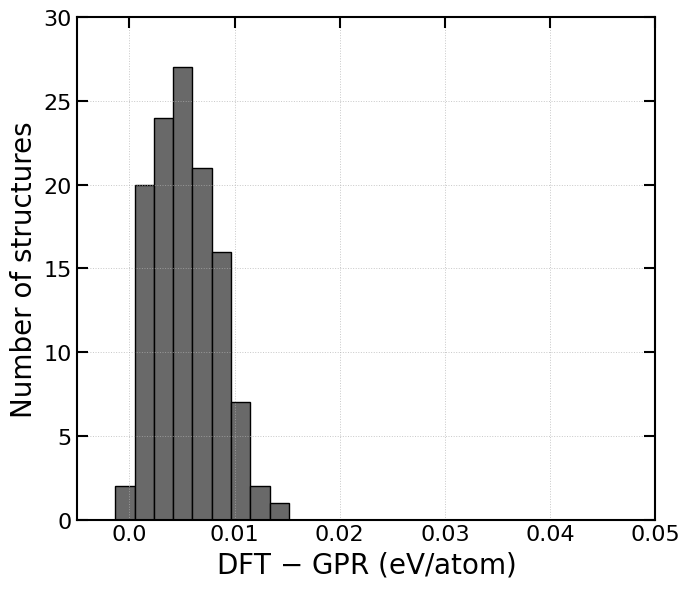

In [38]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.005, 0.05))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.005, 0.05])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.005, 0.05])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 30])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 30])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 4. Augment

So, using these parameters, augment step will be executed.

In [39]:
! sed -i '3s|.*|# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf|' train.in
! sed -i '25s|.*|Additional_write True|' train.in
! sed -i '28s|.*|Disp_length 0.05|' train.in
! sed -i '29s|.*|Num_copy 3|' train.in

In [40]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
Additional_write True

# Data augmentation parameter
Disp_length 0.05
Num_copy 3


In [41]:
! rm -rf additional_xsf/
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 18:47:18.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.025700 s
Maximum CPU memory used:             0.538158 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (60,)  # (N_data, )
Force data size: (60, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

Now, 180 new data have been augmented

In [42]:
! cd ./additional_xsf/ && ls

file_00000.xsf	file_00036.xsf	file_00072.xsf	file_00108.xsf	file_00144.xsf
file_00001.xsf	file_00037.xsf	file_00073.xsf	file_00109.xsf	file_00145.xsf
file_00002.xsf	file_00038.xsf	file_00074.xsf	file_00110.xsf	file_00146.xsf
file_00003.xsf	file_00039.xsf	file_00075.xsf	file_00111.xsf	file_00147.xsf
file_00004.xsf	file_00040.xsf	file_00076.xsf	file_00112.xsf	file_00148.xsf
file_00005.xsf	file_00041.xsf	file_00077.xsf	file_00113.xsf	file_00149.xsf
file_00006.xsf	file_00042.xsf	file_00078.xsf	file_00114.xsf	file_00150.xsf
file_00007.xsf	file_00043.xsf	file_00079.xsf	file_00115.xsf	file_00151.xsf
file_00008.xsf	file_00044.xsf	file_00080.xsf	file_00116.xsf	file_00152.xsf
file_00009.xsf	file_00045.xsf	file_00081.xsf	file_00117.xsf	file_00153.xsf
file_00010.xsf	file_00046.xsf	file_00082.xsf	file_00118.xsf	file_00154.xsf
file_00011.xsf	file_00047.xsf	file_00083.xsf	file_00119.xsf	file_00155.xsf
file_00012.xsf	file_00048.xsf	file_00084.xsf	file_00120.xsf	file_00156.xsf
file_00013.xsf	file_00049

Their structures are perturbed from reference training data and their energy tags are given from the GPR predictions

In [43]:
! cd ./additional_xsf/ && cat file_00015.xsf

# total energy = -18639.4891900976654142 eV

ATOMS
O     9.93108889549001     6.44130112668355     12.33681285037995     0.05676017049180     1.80977766305050     -2.23306445974424
O     8.42072840876676     5.41525646857995     13.48843918040300     1.27734239804688     -3.66104269516853     -2.12379986879654
O     9.98014674427225     4.11614897375455     12.21148494704521     -5.08939876290929     7.97985216253553     1.84009464855702
C     9.23413342099735     7.53865286527566     13.02302400535782     0.01207211163906     -2.38028121756433     2.00987011501185
C     8.00182277294078     6.58273715985493     13.67827045697096     1.83652571293854     5.49140928673247     -5.94174330640616
C     9.41997462414129     5.29004299005189     12.51060973100247     2.07155046401527     -6.91016163567951     0.21595080227418
H     8.89516390765018     8.32113702456552     12.30967969409185     0.33368339883068     -0.12934766569156     -0.11728340338829
H     10.02803376769659     7.7851005

In [44]:
! cd ./additional_xsf/ && cat file_00016.xsf

# total energy = -18638.3804177616912057 eV

ATOMS
O     9.96725248455644     6.44545654408741     12.33830805410176     -0.65570551876677     -0.18660626795918     -0.29522390014189
O     8.55461927227570     5.34194336233681     13.38791293919131     -6.86438655459262     -1.89898089560625     5.38336625745950
O     9.96263038993343     4.12393557216726     12.35860792579188     -1.89892976867809     4.00569962761888     1.31707620977414
C     9.16739395040718     7.51259761916343     13.10556453072822     2.87073272642219     1.20254577159226     -3.12893950083506
C     8.03422249116061     6.62271302493388     13.61015183947051     -0.32392639517951     1.94565901801113     -1.55543203321311
C     9.39043841555336     5.22029302294539     12.68258872617552     8.49818548723772     -1.76368025417760     -5.63146295878361
H     8.95852310983063     8.38739225959171     12.26369711000735     0.55272616513497     -0.99093851899426     1.73609762235689
H     10.04457126488424     7.7760